In [1]:
# 0. Link colab với Drive
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive


In [ ]:
!apt-get install unrar
!unrar x /content/gdrive/MyDrive/SSD/SSDtrain.rar /content/gdrive/MyDrive/BEST

In [4]:
!pip install tensorflow==2.13.0

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.16.1 requires tensorflow<2.17,>=2.16.1; platform_machine != "arm64" or platform_system != "Darwin", but you have tensorflow 2.13.0 which is incompatible.
tf-keras 2.16.0 requires tensorflow<2.17,>=2.16, but you have tensorflow 2.13.0 which is incompatible.
tf-models-official 2.16.0 requires tensorflow~=2.16.1, but you have tensorflow 2.13.0 which is incompatible.


In [ ]:
!pip install tensorflow_io

In [ ]:
!pip install tf-nightly


In [ ]:
import tensorflow
tensorflow.__version__

'2.15.0'

In [ ]:
%cd /content/gdrive/MyDrive/MY_SSD/models/research
!cp object_detection/packages/tf2/setup.py .
!python -m pip install .

In [6]:
# 5. Compile the protos -
# Protocol Buffers (Protobuf) is a free and open-source cross-platform data format used to serialize structured data.
%cd /content/gdrive/MyDrive/MY_SSD/models/research
!protoc object_detection/protos/*.proto --python_out=.

[Errno 2] No such file or directory: '/content/drive/MyDrive/MY_SSD/models/research'
/content/gdrive/MyDrive/MY_SSD/models/research


In [13]:
# Export model
%cd /content/gdrive/MyDrive/MY_SSD/models/research
%cp /content/gdrive/MyDrive/MY_SSD/models/research/object_detection/export_tflite_graph_tf2.py .
!python export_tflite_graph_tf2.py --pipeline_config_path=/content/gdrive/MyDrive/MY_SSD/pretrained/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config \
--trained_checkpoint_dir=/content/gdrive/MyDrive/SSD/SSD_622_16_13/output_model --output_directory=/content/gdrive/MyDrive/MY_SSD/new_data/flite_new

/content/gdrive/MyDrive/MY_SSD/models/research
2024-04-23 08:19:18.912420: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-23 08:19:18.969614: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-23 08:19:18.970306: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-23 08:19:20.332121: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Traceback (most recent call last):
  File "/content/gdrive/MyDrive/MY_SSD/models/research/export_tflite_graph_tf2.py", line 160, in <module>
    app.run(main)
  File "/usr/local/lib/python3.10/dist-packages/absl/app.py", line 308, in run
    _ru

In [14]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_saved_model("/content/gdrive/MyDrive/MY_SSD/new_data/flite/saved_model")
tflite_model = converter.convert()

with open('/content/gdrive/MyDrive/MY_SSD/new_data/flite/model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
import tensorflow as tf
interpreter = tf.lite.Interpreter(model_path="/content/gdrive/MyDrive/BEST/SSD_622_16_3/flite/model.tflite")
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print("input details", input_details)
print("ouput details", output_details)


input details [{'name': 'serving_default_input:0', 'index': 0, 'shape': array([  1, 320, 320,   3], dtype=int32), 'shape_signature': array([  1, 320, 320,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
ouput details [{'name': 'StatefulPartitionedCall:1', 'index': 339, 'shape': array([ 1, 10], dtype=int32), 'shape_signature': array([ 1, 10], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}, {'name': 'StatefulPartitionedCall:3', 'index': 337, 'shape': array([ 1, 10,  4], dtype=int32), 'shape_signature': array([ 1, 10,  4], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters':

In [4]:
import io
import os
import scipy.misc
import numpy as np
import six
import time
import glob
from IPython.display import display

from six import BytesIO

import matplotlib
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import tensorflow as tf
# %cd /content/gdrive/MyDrive/MY_SSD/models/research
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

# Load the TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path="F:\Study\PBL5\SSD\SSDtrain\SSD_622_16_13\\flite_13\model.tflite")
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Các hàm inference

import cv2

def preprocess_image(image):
    # Chuyển đổi ảnh sang kiểu dữ liệu FLOAT32 và chuẩn hóa giá trị pixel về khoảng [0, 1]
    image = image.astype(np.float32) / 255.0
    return image

def run_inference_for_single_image(interpreter, image):
    # Preprocess the input image
    image = cv2.resize(image, (input_details[0]['shape'][2], input_details[0]['shape'][1]))
    image = np.expand_dims(image, axis=0)

    # Set the input tensor
    interpreter.set_tensor(input_details[0]['index'], image)

    # Run inference
    interpreter.invoke()

    # Get outputs
    output_dict = {}
    for i in range(len(output_details)):
        output_data = interpreter.get_tensor(output_details[i]['index'])
        output_dict[output_details[i]['name']] = output_data

    return output_dict

def load_image_into_numpy_array(path):
    img_data = tf.io.gfile.GFile(path, 'rb').read()
    image = Image.open(BytesIO(img_data))
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)

# Path to label map file
label_map_path = "F:\Study\PBL5\SSD\SSDtrain\images\label_map.txt"
category_index = label_map_util.create_category_index_from_labelmap(label_map_path, use_display_name=True)

# Path to input image
image_path = 'F:\Study\PBL5\SSD\darkdata\\020000_11.jpg'
image_np = load_image_into_numpy_array(image_path)
print("Done load image ")
# Hiển thị ảnh đầu vào
plt.figure(figsize=(10, 8))
plt.imshow(image_np)
plt.axis('off')
plt.show()

image_np = cv2.resize(image_np, dsize=None, fx=0.3, fy=0.3)  # Giảm kích thước của ảnh
image_np = preprocess_image(image_np)
output_dict = run_inference_for_single_image(interpreter, image_np)
print("Done inference")

# Lấy index của phần tử có điểm số cao nhất
max_score_index = np.argmax(output_dict['StatefulPartitionedCall:1'])

# Lấy box của phần tử có điểm số cao nhất
max_score_box = output_dict['StatefulPartitionedCall:3'][0][max_score_index]

# Lấy class ID của phần tử có điểm số cao nhất
max_score_class_id = (output_dict['StatefulPartitionedCall:2'][0][max_score_index]+1).astype(np.int64)


# Lấy tên class từ category_index
max_score_class = category_index[max_score_class_id]['name']

# Lấy điểm số của phần tử có điểm số cao nhất
max_score = output_dict['StatefulPartitionedCall:1'][0][max_score_index]

# In ra kết quả dự đoán
print("Class: {}, Score: {}".format(max_score_class, max_score))


# Hiển thị box của phần tử có điểm số cao nhất
vis_util.visualize_boxes_and_labels_on_image_array(
    image_np,
    np.array([max_score_box]),  # Sử dụng box của phần tử có điểm số cao nhất
    np.array([max_score_class_id]),  # Sử dụng class ID của phần tử có điểm số cao nhất
    np.array([output_dict['StatefulPartitionedCall:1'][0][max_score_index]]),  # Sử dụng điểm số của phần tử có điểm số cao nhất
    category_index,
    use_normalized_coordinates=True,
    line_thickness=5
)

# Hiển thị ảnh với box dự đoán
plt.figure(figsize=(10, 8))
plt.imshow(image_np)
plt.axis('off')
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_11316\189671033.py:74: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Done load image 
Done inference
Class: 20000, Score: 0.9979119896888733


C:\Users\Admin\AppData\Local\Temp\ipykernel_11316\189671033.py:116: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


Done load image: F:\Study\PBL5\SSD\darkdata\020000_11.jpg 
Done inference
max_score_index: 0, max_score_box: [0.16273206 0.3057245  0.49638796 0.75968516], max_score_class_id: 5, max_score_class: 20000 
Class: 20000, Score: 0.9979119896888733
Done draw on image 


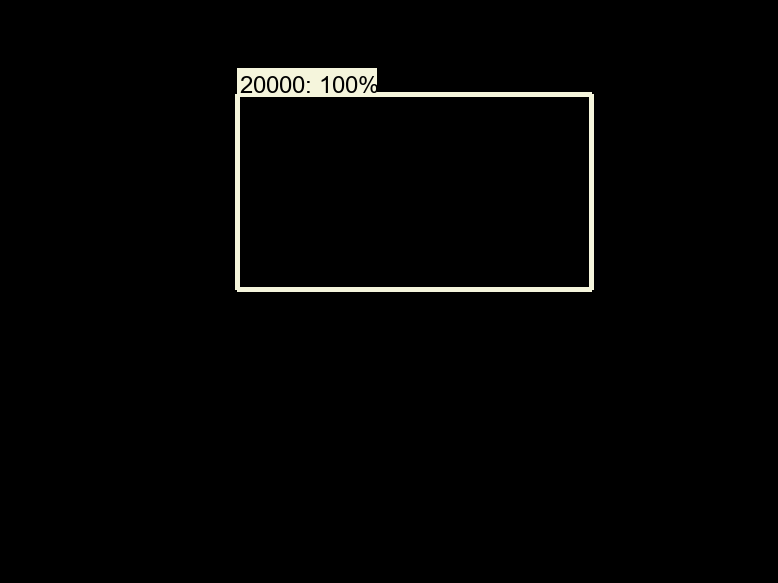

'20000'

In [6]:
import io
import os
import scipy.misc
import numpy as np
import six
import time
import glob
from IPython.display import display

from six import BytesIO

import matplotlib
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import tensorflow as tf
# %cd /content/gdrive/MyDrive/MY_SSD/models/research
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

# Load the TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path="F:\Study\PBL5\SSD\SSDtrain\SSD_622_16_13\\flite_13\model.tflite")
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Các hàm inference

import cv2

def preprocess_image(image):
    # Chuyển đổi ảnh sang kiểu dữ liệu FLOAT32 và chuẩn hóa giá trị pixel về khoảng [0, 1]
    image = image.astype(np.float32) / 255.0
    return image

def run_inference_for_single_image(interpreter, image):
    # Preprocess the input image
    image = cv2.resize(image, (input_details[0]['shape'][2], input_details[0]['shape'][1]))
    image = np.expand_dims(image, axis=0)

    # Set the input tensor
    interpreter.set_tensor(input_details[0]['index'], image)

    # Run inference
    interpreter.invoke()

    # Get outputs
    output_dict = {}
    for i in range(len(output_details)):
        output_data = interpreter.get_tensor(output_details[i]['index'])
        output_dict[output_details[i]['name']] = output_data

    return output_dict

def load_image_into_numpy_array(path):
    img_data = tf.io.gfile.GFile(path, 'rb').read()
    image = Image.open(BytesIO(img_data))
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)

def xuli(image_path):
  image_np = load_image_into_numpy_array(image_path)
  print("Done load image: {} ". format(image_path))
  image_np = cv2.resize(image_np, dsize=None, fx=0.3, fy=0.3)
  image_np = preprocess_image(image_np)
  output_dict = run_inference_for_single_image(interpreter, image_np)
  print("Done inference")

  # Lấy index của phần tử có điểm số cao nhất
  max_score_index = np.argmax(output_dict['StatefulPartitionedCall:1'])


  # Lấy box của phần tử có điểm số cao nhất
  max_score_box = output_dict['StatefulPartitionedCall:3'][0][max_score_index]

  # Lấy class ID của phần tử có điểm số cao nhất
  # đây là lord
  max_score_class_id = (output_dict['StatefulPartitionedCall:2'][0][max_score_index] + 1).astype(np.int64)


  # Lấy tên class từ category_index
  max_score_class = category_index[max_score_class_id]['name']
  # if max_score_class_id in category_index:
  #     # Lấy tên class từ category_index
  #     max_score_class = category_index[max_score_class_id]['name']
  # else:
  #     max_score_class = 'Unknown'
  print("max_score_index: {}, max_score_box: {}, max_score_class_id: {}, max_score_class: {} ".format(max_score_index, max_score_box, max_score_class_id, max_score_class))

  # Lấy điểm số của phần tử có điểm số cao nhất
  max_score = output_dict['StatefulPartitionedCall:1'][0][max_score_index]

  # In ra kết quả dự đoán
  print("Class: {}, Score: {}".format(max_score_class, max_score))


  # Hiển thị box của phần tử có điểm số cao nhất
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      np.array([max_score_box]),  # Sử dụng box của phần tử có điểm số cao nhất
      np.array([max_score_class_id]),  # Sử dụng class ID của phần tử có điểm số cao nhất
      np.array([output_dict['StatefulPartitionedCall:1'][0][max_score_index]]),  # Sử dụng điểm số của phần tử có điểm số cao nhất
      category_index,
      use_normalized_coordinates=True,
      line_thickness=5
  )

  line_thickness=5
  # )
  print("Done draw on image ")
  # Chuyển đổi kiểu dữ liệu của ảnh về np.uint8 trước khi hiển thị
  image_np = image_np.astype(np.uint8)

  # Hiển thị ảnh
  display(Image.fromarray(image_np))
  return max_score_class

# Path to label map file
label_map_path = "F:\Study\PBL5\SSD\SSDtrain\images\label_map.txt"
category_index = label_map_util.create_category_index_from_labelmap(label_map_path, use_display_name=True)

image_path = 'F:\Study\PBL5\SSD\darkdata\\020000_11.jpg'
xuli(image_path)


In [ ]:

/content/gdrive/MyDrive/BEST/SSD_622_16_3/flite/model.tflite

/content/gdrive/MyDrive/datatest

/content/gdrive/MyDrive/SSD/images/label_map.txt



/content/gdrive/MyDrive/MY_SSD/models/research


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()